#### Notation

* $a_t$ = ask price
* $b_t$ = bid price
* $s_t = a_t - b_t$ = bid ask spread
* $x \cdot y$ standard dot product between two vectors in $\mathbb R^N$
* $\mathbb{I}_{A}(x)$ = indicator function for set $A \subset \mathbb R^N$
* $[x]_+ = |x| \mathbb{I}_{x > 0} = \max(x,0)$ = positive part of $x \in \mathbb R$
* $[x]_- = |x| \mathbb{I}_{x < 0} = -\min(x,0)$ = negative part of $x \in \mathbb R$

## Problem description
Consider $T$ trading rounds $t = 1,\ldots, T$ at each trading round agent observes the current 
ask and bid prices, and possibly other order book information, he then has to come up with: 
* trade direction $d_t$, $d_t = 1$ agent will buy, $d_t = -1$ agent will sell, $d_t = 0 $ agent won't take action 
* price deviation: $Z_t$, deviation from the current bid (if $d_t = -1$) or ask( if $d_t = 1$). 

The agent hopes to make profit by issuing a market order at the current bid/ask price $p_t$ and then placing a 
limit order at $p_t + Z_t$.

## Solution
Let:

* $u_t = b_{t+1} - a_t$, if $u_t > 0$ then the agent will have a profit opportunity

* $v_t = a_{t+1} - b_t$, if $v_t < 0$ then the agent willa have a profit opportunity to exploit

$d_t^u, d_t^v$ is the agent prediction for the sign of $u_t$, $v_t$ respectively.  
$Z_t^u, Z_t^v$ is the agent prediction for $|u_t|$, $|v_t|$ respectively.  
Notice that $v_t - u_t = s_{t+1} + s_t \ge 0$.
A strategy is given by a quadruple $(d_t^u, d_t^v, Z_t^u, Z_t^v)$:  
The agent will observe current ask and bid prices $a_t,b_t$ then if $d_t^u > 0$ the agent, expecting an 
upward price movement, will issue a market
order for one unit of asset for $a_t$ and then place a limit sell order for $a_t + Z_t^u$, hence its profit/loss 
from the trade will be $\mathbb{I}_{d_t^u > 0} \min(Z_t^u, u_t)$. The profit/loss deriving from a downward price movent
is obtained in a similar fashion: the agent predicting $d_t^v < 0$ will cross the spread by selling short one unit 
of asset at $b_t$ and place a limit buy order at $b_t - Z_t^v$. 

The payoff at each round is given by :

$$
\begin{align*}
\text{PO}_t &= 
\mathbb{I}_{d_t^u > 0} \min(Z_t^u,[u_t]_+) - \mathbb{I}_{d_t^u > 0} [u_t]_-
+
\mathbb{I}_{d_t^v < 0} \min(Z_t^v,[v_t]_-) - \mathbb{I}_{d_t^v < 0} [v_t]_+ \\
&=
\mathbb{I}_{d_t^u > 0} \mathbb{I}_{\tilde{u_t} > 0} \min(Z_t^u,|u_t|) - \mathbb{I}_{d_t^u > 0}\mathbb{I}_{\tilde{u_t} < 0} |u_t|
+
\mathbb{I}_{d_t^v < 0} \mathbb{I}_{\tilde{v_t} < 0}\min(Z_t^v,|v_t|) - \mathbb{I}_{d_t^v < 0} \mathbb{I}_{\tilde{v_t} > 0} |v_t|
\end{align*}
$$


Let $c_t = \min(Z_t^u, Z_t^v, |u_t|,|v_t|) \ge 0$ Then 

$$
\begin{align*}
\text{PO}_t &\ge c_t \left(
\mathbb{I}_{d_t^u > 0} \mathbb{I}_{\tilde{u_t} > 0}  - \mathbb{I}_{d_t^u > 0}\mathbb{I}_{\tilde{u_t} < 0}
+
\mathbb{I}_{d_t^v < 0} \mathbb{I}_{\tilde{v_t} < 0} - \mathbb{I}_{d_t^v < 0} \mathbb{I}_{\tilde{v_t} > 0}
\right)\\
&=
c_t \left(\mathbb{I}_{\tilde{u_t} > 0} + \mathbb{I}_{\tilde{v_t} < 0} - 
\mathbb{I}_{d_t^u < 0} \mathbb{I}_{\tilde{u_t} > 0}  - \mathbb{I}_{d_t^u > 0}\mathbb{I}_{\tilde{u_t} < 0}
-
\mathbb{I}_{d_t^v > 0} \mathbb{I}_{\tilde{v_t} < 0} - \mathbb{I}_{d_t^v < 0} \mathbb{I}_{\tilde{v_t} > 0}
\right) \\
&=
c_t \left( \mathbb{I}_{\tilde{u_t} > 0} + \mathbb{I}_{\tilde{v_t} < 0} - \mathbb{I}_{d_t^u \neq \tilde{u_t}} - \mathbb{I}_{d_t^v \neq \tilde{v_t}}
\right)
\end{align*}
$$


Fix $c_t = c > 0$, then the above can be interpreted as follows:  
Take the expected value with respect to $u$ and $v$ (since the two series are stationary), the
final wealth will be greater than zero when:  
$\mathbb{P}[d^u > 0, u > 0] > \mathbb{P}[d^u > 0, u < 0]$  and
$\mathbb{P}[d^v < 0, v < 0] > \mathbb{P}[d^v < 0, v > 0]$.  
Hence the priority here will be to correctly build a classifier such that the number of mistakes

$$
M_T = 
\sum_{t=1}^T \mathbb{I}_{d_t^u \neq \tilde{u}_t} + \mathbb{I}_{d_t^v \neq \tilde{v}_t}
$$

Will be minimized.  

### Classificiation
I assume linear models for sign prediction: $\tilde{u}$ is correctly classified whenever $\tilde{u}(x_1 \cdot w_1) \ge 0$, for feature vector $x_1$ and weighs $w_1$, it must be that $|x_1 \cdot w_1| \le 1$. The model for $\tilde{v}$ is defined analogously.

The loss to minimize at each round is the zero one loss both for $\tilde{u}$ and $\tilde{u}$, we can bound the 
01 loss by the quadratic hinge loss $\ell(y,\widehat{y}) = (1 - y\widehat{y})^2\mathbb{I}_{y \neq \widehat{y}}$

Running a vanilla perceptron for classification produces poor results:
Suppose that perfect linear separation is achieved, that is there exists a vector $u$ such that when the perceptron
is run the cumulative hinge loss $\sum_{t=1}^T (1 - y_t u \cdot x_t)_+ = 0$, then

$$\text{#Mistakes made by the perceptron} \le \left( \frac{\max_{t=1,\ldots,T} \|x_t\|_2 \|u\|_2}{\min_{
t=1,\ldots, T } y_t  u \cdot x_t } \right)^2 
$$

If $w_t$ happens to be the vector that separates instances $(y_1,x_1), \ldots, (y_t,x_t)$ then the perceptron encounters the greatest trouble if the next instance $(y_{t+1},x_{t+1})$ is such that $x_t$ is high in magnitude 
$\|x_t\|_2$ or $x_t$ forms an approx 90 degree angle with $w_t$. 
This means that to fool the perceptron at $t+1$ you can feed it with correlated feature vectors $x_1,\ldots, x_t$ and
then a large uncorrelated $x_{t+1}$ at $t+1$.  
If the all the feature vectors $x_1, \ldots, x_T$ are whitened, that is premultiplied by matrix $M^{-1/2}$, where  $M = \sum_{s=1}^t x_s x_s^T$ and also 
if the perceptron produces vector $M^{1/2}w_t$ then, mistakes made up to $t$
are bounded by 

$$
\left(
\frac{\max_{s=1,\ldots,t}(x_s^T M^{-1} x_s) (w_t^T M^{1} w_t)}{\min_{s=1,\ldots,t} y_s w_t \cdot x_s}
\right)^2
$$

The data is separated by the same unnormalized margin $\min_t y_t u \cdot x_t$

Whitening the data has the effect of minimize the 'leaning' of $w_t$ towards correlated $x_1,\ldots, x_t$, producing less mistakes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rc('figure',figsize=(16,9),dpi=80)

df = pd.read_csv('data/raw/data_binance.csv')
df.columns=['timestamp','ask','bid','ask_size','bid_size','sell_qty','buy_qty']
df.timestamp = pd.to_datetime(df.timestamp)
# df = df.set_index('timestamp').resample('10s').apply({'bid': np.mean, 
#                                                       'ask': np.mean,
#                                                       'bid_size': np.sum,
#                                                       'ask_size': np.sum,
#                                                       'sell_qty': np.sum,
#                                                       'buy_qty': np.sum
#                                                      })
df.set_index('timestamp',inplace=True)

df['ofi'] = (df.ask.diff() >= 0).astype(int) * df.ask_size.shift(-1).apply(np.abs) -\
              (df.ask.diff() <= 0).astype(int) * df.ask_size.apply(np.abs) +\
              (df.bid.diff() >= 0).astype(int) * df.bid_size.apply(np.abs) -\
              (df.bid.diff() <= 0).astype(int) * df.bid_size.shift(-1).apply(np.abs) 
df.head()

,ask,bid,ask_size,bid_size,sell_qty,buy_qty,ofi
timestamp,,,,,,,
2021-02-25 17:01:31.296035,50531.85,50528.71,0.260000,1.000000,15.656524,23.955780,0.000000
2021-02-25 17:01:36.794538,50530.12,50520.55,0.057893,0.435920,2.459863,4.371013,-0.798632
2021-02-25 17:01:42.284479,50527.46,50527.45,0.262615,0.740739,0.252142,1.297689,0.478124
2021-02-25 17:01:47.767470,50546.39,50543.52,0.178088,0.060905,4.029092,1.010848,0.068835
2021-02-25 17:01:53.686262,50516.41,50512.42,0.007930,0.231455,2.226948,1.904901,-0.154902


In [28]:
df['spread'] = df.ask - df.bid
X1 = df.copy()
X2 = df.copy()
X1['u'] = df.bid.shift() - df.ask
X2['v'] = df.ask.shift() - df.bid

In [29]:
X1['u_prev'] = X1.u.shift(1)
X2['v_prev'] = X2.v.shift(1)
# X1['runs'] = X1.fillna(0).u.apply(np.sign).cumcount()
X1.head()

,ask,bid,ask_size,bid_size,sell_qty,buy_qty,ofi,spread,u,u_prev
timestamp,,,,,,,,,,
2021-02-25 17:01:31.296035,50531.85,50528.71,0.260000,1.000000,15.656524,23.955780,0.000000,3.14,NaN,NaN
2021-02-25 17:01:36.794538,50530.12,50520.55,0.057893,0.435920,2.459863,4.371013,-0.798632,9.57,-1.41,NaN
2021-02-25 17:01:42.284479,50527.46,50527.45,0.262615,0.740739,0.252142,1.297689,0.478124,0.01,-6.91,-1.41
2021-02-25 17:01:47.767470,50546.39,50543.52,0.178088,0.060905,4.029092,1.010848,0.068835,2.87,-18.94,-6.91
2021-02-25 17:01:53.686262,50516.41,50512.42,0.007930,0.231455,2.226948,1.904901,-0.154902,3.99,27.11,-18.94


In [30]:
X1['u_sign'] = np.sign(X1.u_prev)
X1['runs'] = X1.groupby('u_sign').cumcount()
X2['v_sign'] = np.sign(X2.v_prev)
X2['runs'] = X2.groupby('v_sign').cumcount()

In [31]:
X1.head()

,ask,bid,ask_size,bid_size,sell_qty,buy_qty,ofi,spread,u,u_prev,u_sign,runs
timestamp,,,,,,,,,,,,
2021-02-25 17:01:31.296035,50531.85,50528.71,0.260000,1.000000,15.656524,23.955780,0.000000,3.14,NaN,NaN,NaN,0
2021-02-25 17:01:36.794538,50530.12,50520.55,0.057893,0.435920,2.459863,4.371013,-0.798632,9.57,-1.41,NaN,NaN,1
2021-02-25 17:01:42.284479,50527.46,50527.45,0.262615,0.740739,0.252142,1.297689,0.478124,0.01,-6.91,-1.41,-1.0,0
2021-02-25 17:01:47.767470,50546.39,50543.52,0.178088,0.060905,4.029092,1.010848,0.068835,2.87,-18.94,-6.91,-1.0,1
2021-02-25 17:01:53.686262,50516.41,50512.42,0.007930,0.231455,2.226948,1.904901,-0.154902,3.99,27.11,-18.94,-1.0,2


In [54]:
x1 = X1.dropna().drop(['u','ask_size','bid_size','u_prev','ask','bid','u_sign','runs'],axis=1).values
x2 = X2.dropna().drop(['v','ask_size','bid_size','v_prev','ask','bid','v_sign','runs'],axis=1).values

T,p = x1.shape

u = X1.dropna().u.values
v = X2.dropna().v.values

w1 = np.zeros((T,p))
w2 = np.zeros((T,p))
_w1 = np.zeros((T,p))
_w2 = np.zeros((T,p))

In [55]:
DEBUG = 1

QTY = 13
wealth = np.zeros(T)
eps = 0

def loss1(sign, t, eps = 30.):
    if sign > 0:
        return np.minimum(eps, sign*u[t]) 
    else:
        return 0
def loss2(sign, t ,eps = 30.):
    if sign < 0:
        return np.minimum(eps, sign * v[t]) 
    else:
        return 0


eps_u = np.ones(T) * 100
eps_v = np.ones(T) * 100

a = 3

M1 = a * np.eye(p)
M1_inv = 1/a * np.eye(p)
M2 = a * np.eye(p)
M2_inv = 1/a * np.eye(p)

errors = 0

for t in range(T-1):
    # prediction
    y_pred1 = np.sign(np.dot(w1[t],x1[t]))
    y_pred2 = np.sign(np.dot(w2[t],x2[t])) if y_pred1 !=1 else 1

    # suffer loss 
    gains1 = loss1(y_pred1, t, QTY)
    gains2 = loss2(y_pred2, t, QTY)
    wealth[t+1] = wealth[t] + gains1 + gains2

    # SOP Update
    mistake1 = y_pred1 * np.sign(u[t]) <= 0
    mistake2 = y_pred2 * np.sign(v[t]) <= 0
    
    if DEBUG:
        errors += int(mistake1) + int(mistake2)
    
    grad1 = x1[t] * np.sign(u[t]) * int(mistake1)
    grad2 = x2[t] * np.sign(v[t]) * int(mistake2)

    increase_1 = np.outer(x1[t],x1[t]) * int(mistake1)
    increase_2 = np.outer(x2[t],x2[t]) * int(mistake2)

    M1 = M1 + increase_1
    M1_inv = M1_inv - M1_inv.dot(increase_1).dot(M1_inv)/(1+ x1[t].dot(M1_inv).dot(x1[t]))
    M2 = M1 + increase_2
    M2_inv = M2_inv - M2_inv.dot(increase_2).dot(M2_inv)/(1+ x2[t].dot(M2_inv).dot(x2[t]))
    
    ### update 
    w1[t+1] = M1_inv.dot(_w1[t])
    _w1[t+1] = _w1[t] + grad1
    w2[t+1] = M2_inv.dot(_w2[t])
    _w2[t+1] = _w2[t] + grad2

print(f'accuracy {np.round(1-errors/(2*T),2)}')

accuracy 0.84


In [56]:
# compare the result with a only buy only sell strategy
a = 3

wealth_bo = np.zeros(T) # wealth buy only
wealth_so = np.zeros(T) # wealth sell only
errors = 0

for t in range(T-1):
    # suffer loss 
    wealth_bo[t+1] = wealth_bo[t] + loss1(1,t,QTY) + loss2(1,t,QTY)
    wealth_so[t+1] = wealth_so[t] + loss1(-1,t,QTY) + loss2(-1,t,QTY)


In [57]:
# randomly picks price direction according to a Bernoulli(.5)
from scipy.stats import bernoulli
wealth_ran = np.zeros(T) # random picks
errors = 0

for t in range(T-1):
    # suffer loss 
    direction = bernoulli.rvs(.5,size=1)
    wealth_ran[t+1] = wealth_ran[t] + loss1(direction,t,QTY) + loss2(direction,t,QTY)


In [58]:
# vanilla perceptron
x1_c = x1.copy()/max([np.linalg.norm(x_) for x_ in x1])
x2_c = x2.copy()/max([np.linalg.norm(x_) for x_ in x2])

w1 = np.zeros((T,p))
w2 = np.zeros((T,p))
wealth_per = np.zeros(T)
DEBUG = 1


for t in range(T-1):
    # prediction
    y_pred1 = np.sign(np.dot(w1[t],x1_c[t]))
    y_pred2 = np.sign(np.dot(w2[t],x2_c[t])) if y_pred1 !=1 else 1

    # suffer loss 
    gains1 = loss1(y_pred1, t, QTY)
    gains2 = loss2(y_pred2, t, QTY)
    wealth_per[t+1] = wealth_per[t] + gains1 + gains2

    # SOP Update
    mistake1 = y_pred1 * np.sign(u[t]) <= 0
    mistake2 = y_pred2 * np.sign(v[t]) <= 0
    
    if DEBUG:
        errors += int(mistake1) + int(mistake2)
    
    grad1 = x1_c[t] * np.sign(u[t]) * int(mistake1)
    grad2 = x2_c[t] * np.sign(v[t]) * int(mistake2)

    ### update 
    w1[t+1] = w1[t] + grad1
    w2[t+1] = w2[t] + grad2

print(f'accuracy {np.round(1-errors/(2*T),2)}')

accuracy 0.81


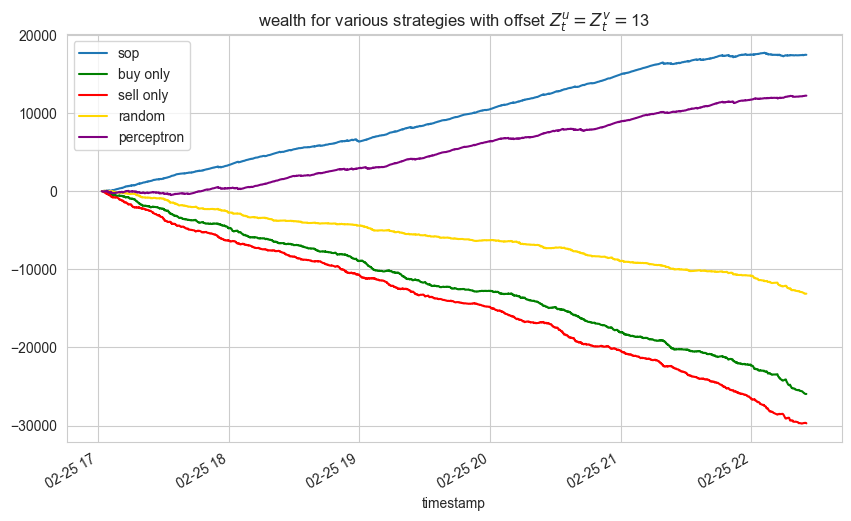

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6), dpi=100)
pd.Series(wealth,index=X1.dropna().index).plot(label='sop')
pd.Series(wealth_bo,index=X1.dropna().index).plot(label='buy only',color='green')
pd.Series(wealth_so,index=X1.dropna().index).plot(label='sell only',color='red')
pd.Series(wealth_ran,index=X1.dropna().index).plot(label='random',color='gold')
pd.Series(wealth_per,index=X1.dropna().index).plot(label='perceptron',color='purple')
plt.legend()
_= plt.title(f'wealth for various strategies with offset $Z_t^u = Z_t^v=${QTY}')

Text(0.5, 0, 'lag')

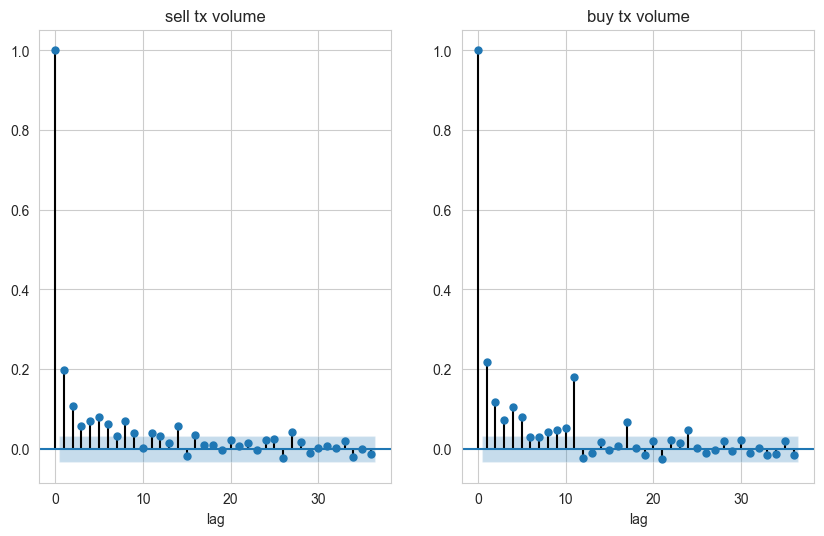

In [74]:
# why the whitening perceptron does work?
import statsmodels.api as sm
fig, ax = plt.subplots(1,2,figsize=(10,6), dpi=100)
_ = sm.graphics.tsa.plot_pacf(df.dropna()['sell_qty'], ax=ax[0])
_ = sm.graphics.tsa.plot_pacf(df.dropna()['buy_qty'], ax=ax[1])
ax[0].set_title('sell tx volume')
ax[1].set_title('buy tx volume')
ax[0].set_xlabel('lag')
ax[1].set_xlabel('lag')

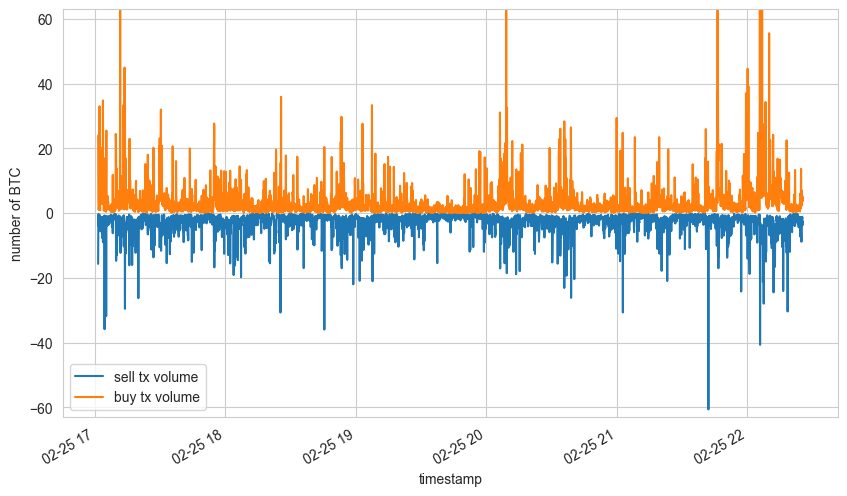

In [84]:
plt.figure(figsize=(10,6), dpi=100)
(-df.sell_qty).plot(figsize=(10,6),label='sell tx volume')
df.buy_qty.plot(figsize=(10,6), label='buy tx volume')
plt.ylim((-63,63))
plt.ylabel('number of BTC')
plt.legend()

### Why the whitened perceptron works
* Inspecting the acfplots above we see that features presents significant autocorrelation, which intuitively implies that $x_t$ is correlated with $x_{t-1},x_{t-2}$ and so on. Suppose the binary classification problems both for the sign of $u_t$ and $v_t$ are 
linearly separable. The vanilla perceptron will tilt the separating hyperplanes towards all the previous values 
for $x_t$ leaving the perceptron prone to mistakes, when a large uncorrelated feature $x_{t+1}$ arrives

* The feature vectors have values that greatly differ in magnitude, the rescaling is recommended, and in the
2nd order perceptron rescaling is obtained by premultiplying by $M^{-1/2}$:

The bound on the mistakes made by the second order perceptron is given by :

$$
\sum_{t=1}^T \mathbb{I}_{d_t^u \neq \tilde{u}} \le \inf_{y > 0} \min_{w \in \mathbb{R}^d} \frac{L_{\gamma,T}(w)}{\gamma}  + \frac{1}{\gamma} \sqrt{
\left( a \|w\|^2 + w^T A_n w \right) \sum_{i=1}^d \ln \left(1 + \frac{\lambda_i}{a} \right)
}
$$

where:
$$
L_{\gamma,T}(w) = \sum_{t=1}^T(\gamma - \tilde{u_t} w \cdot x_t)^2 \mathbb{I}_{y_t w \cdot x_t < 0} 
$$

## Magnitude prediction
Now that we have choosen a decent classifier, we have to decide the offset (number of ticks) at which we place
the market order. When decent accuracy is achieved, the agent is practically able to make a profit after $T$ trading
rounds.  

The closed form expression for the profit would encourage any forecaster, to shoot for the highest value of $Z_t$,
since max profit is capped at $u_{t+1}$ or $v_{t+1}$ for any correct prediction.  
In real world scenario, in case of correct price direction prediction, overshooting the value of $u_t$ (for example) will most definitively lead to an unfilled order. The agent, however, can potentially recover from such a situation
(by simply cancelling the limit order 
and issuing a market order at $a_t + u_{t+1}$ and eventually paying extra taker fees).  
We can however cast the problem into prediction with expert advice. To each expert we associate a value $\epsilon$
in a equally spaced partition range $\Pi = \{z_{min}, z_{min}+\delta, \ldots, z_{max} - \delta, z_{max}\}$ where $\delta$ is
a multiple of tick size, and $z_{min},z_{max}$ are predetermined parameters. 

In particular to discourage expert $\epsilon$ to exceed $|u_t|$ we can reward each expert with gain per round : $\min(\epsilon, 
|u_t|)$ if $\epsilon \le |u_t|$ and $0$ otherwise. 
Let $H_{i,t}$ be the cumulative reward associated to the $i$-th expert up to time $t$, that is:

$$
H_{i,t} = \sum_{s =1}^t \underbrace{\min(z_{i}, |u_s|) \mathbb{I}_{z_{i} \le |u_s|}}_{h_{s,i}}
$$

The forecaster then will issue a limit order at price:

$$
Z_t^u = \sum_{i=1}^N  \frac{z_i H_{i,t}}{\sum_{i=1}^N H_{i,t}} = \sum_{i=1}^N z_i p_{t,i}
$$

Where $N = |\Pi|$ is the size of the partition. $p_t$ is a probability distribution on the $N$ dimensional simplex.
The above algorithm is equivalent to the Hedge algorithm with weights given by $\exp(\log \frac{H_{t,i}}{H_{t-1,i}})$
$i = 1\ldots N$.  

In [61]:
x1 = X1.dropna().drop('u',axis=1).values
x2 = X2.dropna().drop('v',axis=1).values

T,p = x1.shape

w1 = np.zeros((T,p))
w2 = np.zeros((T,p))
_w1 = np.zeros((T,p))
_w2 = np.zeros((T,p))

errors = 0
epss = np.arange(20.,30.,1.)
d = epss.shape[0]

mix1 = np.ones((T,d))/d
mix2 = np.ones((T,d))/d

prec1 = np.ones((T,d)) * 1e-8
prec2 = np.ones((T,d)) * 1e-8

a = 3

M1 = a * np.eye(p)
M1_inv = 1/a * np.eye(p)
M2 = a * np.eye(p)
M2_inv = 1/a * np.eye(p)

lam = .03

def loss1(sign, t, eps = 3.):
    if sign > 0:
        return np.minimum(eps, sign*u[t]) 
    else:
        return 0
def loss2(sign, t ,eps = 3.):
    if sign < 0:
        return np.minimum(eps, sign * v[t]) 
    else:
        return 0
    
def backtest(init_cap = 300, eta1 = .1, eta2 = .1):
    global errors,M1,M2,M1_inv,M2_inv
    wealth = np.zeros(T)
    wealth[0] = init_cap
    for t in range(T-1):
        # prediction
        y_pred1 = np.sign(np.dot(w1[t],x1[t]))
        y_pred2 = np.sign(np.dot(w2[t],x2[t])) if y_pred1 !=1 else 1

        # experts update
        for i in range(d):
            prec1[t+1,i] = prec1[t,i] + epss[i] if epss[i] <= np.abs(u[t]) else 1e-8
            prec2[t+1,i] = prec2[t,i] + epss[i] if epss[i] <= np.abs(v[t]) else 1e-8
            
            
        # forecaster prec
        e1 = (prec1[t]/prec1[t].sum()).dot(epss)
        e2 = (prec2[t]/prec2[t].sum()).dot(epss)
        
        g1 = loss1(y_pred1,t, e1)
        g2 = loss2(y_pred2,t, e2)
        
        wealth[t+1] = wealth[t] + g1 + g2

        # SOP Update
        mistake1 = y_pred1 * np.sign(u[t]) <= 0
        mistake2 = y_pred2 * np.sign(v[t]) <= 0

        if DEBUG:
            errors += int(mistake1) + int(mistake2)

        grad1 = x1[t] * np.sign(u[t]) * int(mistake1)
        grad2 = x2[t] * np.sign(v[t]) * int(mistake2)

        increase_1 = np.outer(x1[t],x1[t]) * int(mistake1)
        increase_2 = np.outer(x2[t],x2[t]) * int(mistake2)

        M1 = M1 + increase_1
        M1_inv = M1_inv - M1_inv.dot(increase_1).dot(M1_inv)/(1+ x1[t].dot(M1_inv).dot(x1[t]))
        M2 = M1 + increase_2
        M2_inv = M2_inv - M2_inv.dot(increase_2).dot(M2_inv)/(1+ x2[t].dot(M2_inv).dot(x2[t]))

        ### update 
        w1[t+1] = M1_inv.dot(_w1[t])
        _w1[t+1] = _w1[t] + grad1
        w2[t+1] = M2_inv.dot(_w2[t])
        _w2[t+1] = _w2[t] + grad2

    if DEBUG:
        print(f'accuracy {np.round(1-errors/(2*T),2)}')
    return wealth
            
wealth = backtest()

accuracy 0.87


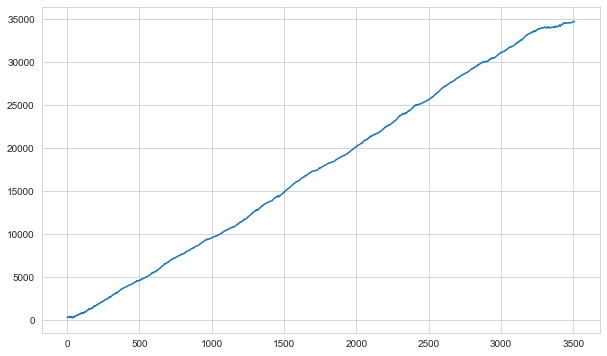

In [62]:
plt.figure(figsize=(10,6))
pd.Series(wealth).plot()

In [63]:
# from empyrical import cum_returns, max_drawdown, calmar_ratio, sharpe_ratio
rets = pd.Series(wealth,index=X1.dropna().index).pct_change().dropna()
max_drawdown = rets.min()
sharpe_ratio = rets.mean()/rets.std()
omega_ratio = rets.mean()/(-max_drawdown)

In [64]:
max_drawdown, sharpe_ratio, omega_ratio

(-0.23219357494615078, 0.13837861614116653, 0.006069394181390192)

### Commenti
La soluzione mi sembra soddisfacente.
Il livello di rischio (drawdown) e' abbastanza contenuto. Ho cambiato approccio rispetto, visto che praticamente ho fatto due problemi di classificazione in parallelo, invece che uno come in precedenza.

In [ ]:
q_sell = df.sell_qty.quantile([.1,.9]).values
q_buy = df.buy_qty.quantile([.1,.9]).values
s_ask = df.ask_size.quantile([.1,.9]).values
s_bid = df.bid_size.quantile([.1,.9]).values

In [ ]:
qty = pd.concat([-df.sell_qty[(df.sell_qty < q_sell[1])],\
           df.buy_qty[(df.buy_qty < q_buy[1])]])
size = pd.concat([-df.ask_size[(df.ask_size < s_ask[1])],\
           df.bid_size[(df.bid_size < s_bid[1])]])

In [ ]:
N = min(qty.shape[0], size.shape[0])
sns.jointplot(x=qty.values[:N],y=size.values[:N])

In [ ]:
sns.jointplot?

* best expert
* strategia baseline molto semplice
* strategia che si basa sul fatto che il trend precedente funziona
* Running average negli ultimi es 10 gg (nessuno delle cose che ho fatto tiene conto della stazionarieta')

* Formula il problema e poi parla dei dati

al: cesa.bianchi@gmail.com

Se hai tempo prova a vedere l'aspetto moltiplicativo,
la media mobile, benchmark, (baseline che usa glistessi dati). Se hai tempo da qui all'otto puoi esplorare l'aspetto
moltiplicativo, pero' e' piu' realistico.